In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.exposure import cumulative_distribution

In [2]:
file_path = ("data/moutain.jpg")
file_path_2 = ("data/flower.jpg")

# 2.3

(0.0, 256.0)

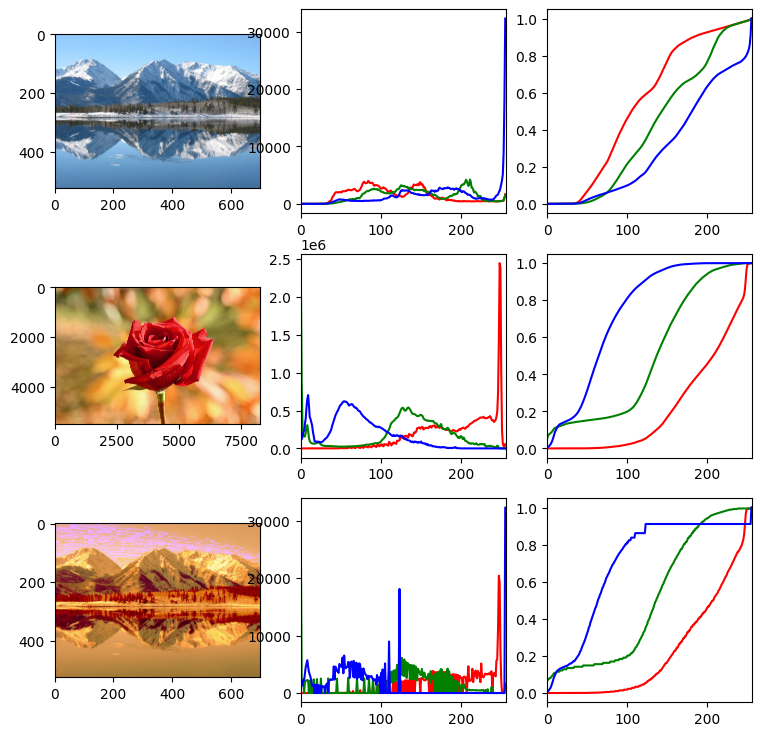

In [3]:
def cdf(img):
  c, b = cumulative_distribution(img)
  # print(c, b)
  for i in range(b[0]):
      c = np.insert(c, 0, 0)
  for i in range(b[-1] + 1, 256):
      c = np.append(c, 1)
  return c

def hist_matching(c, ct, im):
    b = np.interp(c, ct, np.arange(256))
    pix_repl =  {i: b[i] for i in range(256)}
    mp = np.arange(0, 256)
    for (k, v) in pix_repl.items():
        mp[k] = v
    s = im.shape
    im = np.reshape(mp[im.ravel()], im.shape)
    im = np.reshape(im, s)
    return im

moutain = cv2.imread(file_path)
flower = cv2.imread(file_path_2)
fig = plt.figure(figsize=(9, 9))

#--------------------Image--------------------#

fig.add_subplot(3, 3, 1)
img1 = cv2.cvtColor(moutain, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

fig.add_subplot(3, 3, 2)
histr = cv2.calcHist([img1],[0],None,[256],[0,256])
plt.plot(histr,color = 'r')
plt.xlim([0,256])
histr = cv2.calcHist([img1],[1],None,[256],[0,256])
plt.plot(histr,color = 'g')
plt.xlim([0,256])
histr = cv2.calcHist([img1],[2],None,[256],[0,256])
plt.plot(histr,color = 'b')
plt.xlim([0,256])

# cdf
r, g, b = cv2.split(img1)
cdf_b = cdf(b)
cdf_g = cdf(g)
cdf_r = cdf(r)
fig.add_subplot(3, 3, 3)
plt.plot(cdf_r,color = 'r')
plt.xlim([0,256])
plt.plot(cdf_g,color = 'g')
plt.xlim([0,256])
plt.plot(cdf_b,color = 'b')
plt.xlim([0,256])

#--------------------Template--------------------#

fig.add_subplot(3, 3, 4)
img2 = cv2.cvtColor(flower, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

fig.add_subplot(3, 3, 5)
histr = cv2.calcHist([img2],[0],None,[256],[0,256])
plt.plot(histr,color = 'r')
plt.xlim([0,256])
histr = cv2.calcHist([img2],[1],None,[256],[0,256])
plt.plot(histr,color = 'g')
plt.xlim([0,256])
histr = cv2.calcHist([img2],[2],None,[256],[0,256])
plt.plot(histr,color = 'b')
plt.xlim([0,256])

# cdf
tr, tg, tb = cv2.split(img2)
cdf_tb = cdf(tb)
cdf_tg = cdf(tg)
cdf_tr = cdf(tr)
fig.add_subplot(3, 3, 6)
plt.plot(cdf_tr,color = 'r')
plt.xlim([0,256])
plt.plot(cdf_tg,color = 'g')
plt.xlim([0,256])
plt.plot(cdf_tb,color = 'b')
plt.xlim([0,256])

#--------------------New_Image--------------------#

new_img = img1.copy()

r, g, b = cv2.split(new_img)
cdf_nb = cdf(b)
cdf_ng = cdf(g)
cdf_nr = cdf(r)

# matching
new_img[:,:,0] = hist_matching(cdf_nr, cdf_tr, new_img[:,:,0])
new_img[:,:,1] = hist_matching(cdf_ng, cdf_tg, new_img[:,:,1])
new_img[:,:,2] = hist_matching(cdf_nb, cdf_tb, new_img[:,:,2])
fig.add_subplot(3, 3, 7)
plt.imshow(new_img)

fig.add_subplot(3, 3, 8)
histr = cv2.calcHist([new_img],[0],None,[256],[0,256])
plt.plot(histr,color = 'r')
plt.xlim([0,256])
histr = cv2.calcHist([new_img],[1],None,[256],[0,256])
plt.plot(histr,color = 'g')
plt.xlim([0,256])
histr = cv2.calcHist([new_img],[2],None,[256],[0,256])
plt.plot(histr,color = 'b')
plt.xlim([0,256])

# cdf
r, g, b = cv2.split(new_img)
cdf_nb = cdf(b)
cdf_ng = cdf(g)
cdf_nr = cdf(r)
fig.add_subplot(3, 3, 9)
plt.plot(cdf_nr,color = 'r')
plt.xlim([0,256])
plt.plot(cdf_ng,color = 'g')
plt.xlim([0,256])
plt.plot(cdf_nb,color = 'b')
plt.xlim([0,256])
